In [1]:
from lineage_motif.plot import *
from lineage_motif.resample import *
from lineage_motif.simulate import *

In [2]:
transition_matrix = np.array([[0.2, 0.4, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0.2, 0, 0.4, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0.2, 0, 0, 0.4, 0.4, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0.2, 0, 0, 0, 0.4, 0.4, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0.4, 0.4, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.4, 0.4, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0.4, 0.4],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                             ])

In [3]:
all_trees_unsorted = [simulate_tree(transition_matrix, starting_progenitor='i', labels='ijklmnoABCDEFGH') for i in range(5000)]
all_trees_sorted = [sort_align_tree(i) for i in all_trees_unsorted]
all_trees_sorted[:10]

['(((H,(G,H)),(H,(G,G))),(((C,(C,D)),(A,A)),((G,(H,H)),(G,(H,(G,H))))))',
 '((((((E,E),(E,E)),(((F,F),((E,E),(H,(G,(G,G))))),((G,H),(G,H)))),((((A,B),(B,B)),(C,(D,(C,C)))),(B,(A,A)))),((C,D),(A,(B,(A,(A,B)))))),((F,F),(G,G)))',
 '((((E,F),(H,H)),((H,(H,(G,(G,G)))),(E,(((E,E),(E,F)),F)))),(((G,(G,H)),((G,(G,H)),(H,(G,G)))),(H,(G,H))))',
 '(((C,D),(B,(A,B))),((C,D),(((C,D),(D,D)),(C,(C,C)))))',
 '(((E,(E,E)),((E,(F,(E,F))),(E,F))),((F,(E,F)),(G,(G,H))))',
 '((((B,B),(C,D)),(((D,D),(((C,D),((A,A),(A,(A,A)))),(C,D))),((D,(D,D)),((A,B),(B,B))))),((F,F),(F,(E,F))))',
 '(((E,E),(G,H)),((F,F),(G,H)))',
 '((((G,H),(E,(E,E))),((E,E),(F,(E,F)))),(((A,(B,(A,B))),(D,D)),(D,D)))',
 '(((((A,A),(((A,B),((C,D),(D,D))),(D,(C,(C,D))))),(((A,(B,B)),(C,D)),(C,(C,D)))),((G,H),(((G,H),(H,(G,G))),H))),((C,(C,D)),(((C,D),(D,D)),(C,(D,D)))))',
 '(((F,(E,F)),(((G,H),(E,(F,F))),(E,F))),(((A,(A,(B,(A,(A,B))))),(C,D)),(B,(A,B))))']

In [5]:
(doublet_dict, 
 cell_fates, 
 dfs_c_doublet) = resample_trees_doublets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto',
                                           calc_expected=False
                                           )

100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [6]:
all_cells = make_df_all_cells(all_trees_sorted, make_cell_dict(cell_fates), 'observed', True)
all_cells/all_cells.sum()

NameError: name 'make_df_all_cells' is not defined

In [ ]:
cell_color_dict = make_color_dict(cell_fates, ['#F89A3A', 
                                               '#9C80B8', 
                                               '#F071AB', 
                                               '#F0E135',
                                               '#5FC0D4', 
                                               '#7EC352',
                                               ]+[colorcet.glasbey_category10[5]]+[colorcet.glasbey_category10[7]])

In [ ]:
fig, ax = pyplot.subplots(1, 1, figsize=(3.25,3))
i=0

dict_all_cells_true = all_cells.sort_index()['observed'].to_dict()
cells = np.array([k for k, v in dict_all_cells_true.items()])
cell_counts = np.array([v for k, v in dict_all_cells_true.items()])
norm_cell_counts = np.round(cell_counts/cell_counts.sum()*100, 2)

norm_cell_counts_str = [f' ('+str(percent)+'%)' for ind, percent in enumerate(norm_cell_counts)]
annot = [str(count)+' '+cell+suffix for count, cell, suffix in zip(cell_counts, cells, norm_cell_counts_str)]

data = dict_all_cells_true.values()

colors_to_use = cell_color_dict.values()
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-200, colors=colors_to_use, )

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for b, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[b], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw, **{'fontname':'DejaVu Sans', 'size':8})

ax.set_title(f"Pre-determined states \n cell fate proportions", y=1, **{'fontname':'DejaVu Sans', 'size':8})

pyplot.tight_layout(h_pad=-8, w_pad=4)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.grid(False)
#pyplot.title("Cell fate proportions across zebrafish retina regions", y=0, **{'fontname':'DejaVu Sans', 'size':8}, fontweight="bold")

image_format = 'svg'

#pyplot.savefig(f"predet_states_cell_fate_proportions_v02.{image_format}", dpi=300, bbox_inches="tight")

In [ ]:
(doublet_dict_ss,
 df_true_melt_subset_doublet, 
 df_melt_subset_doublet, 
 df_melt_100resamples_subset_doublet, 
 df_null_zscores_i_c_melt_subset_doublet, 
 df_null_zscores_i_c_melt_100resamples_subset_doublet) = dfs_for_plotting(dfs_c_doublet, 
                                                                       1000, 
                                                                       doublet_dict, 
                                                                       cutoff=None, 
                                                                       num_null=100,
                                                                       use_expected=False,
                                                                         min_cell_types=1)

100%|██████████| 100/100 [00:03<00:00, 26.90it/s]


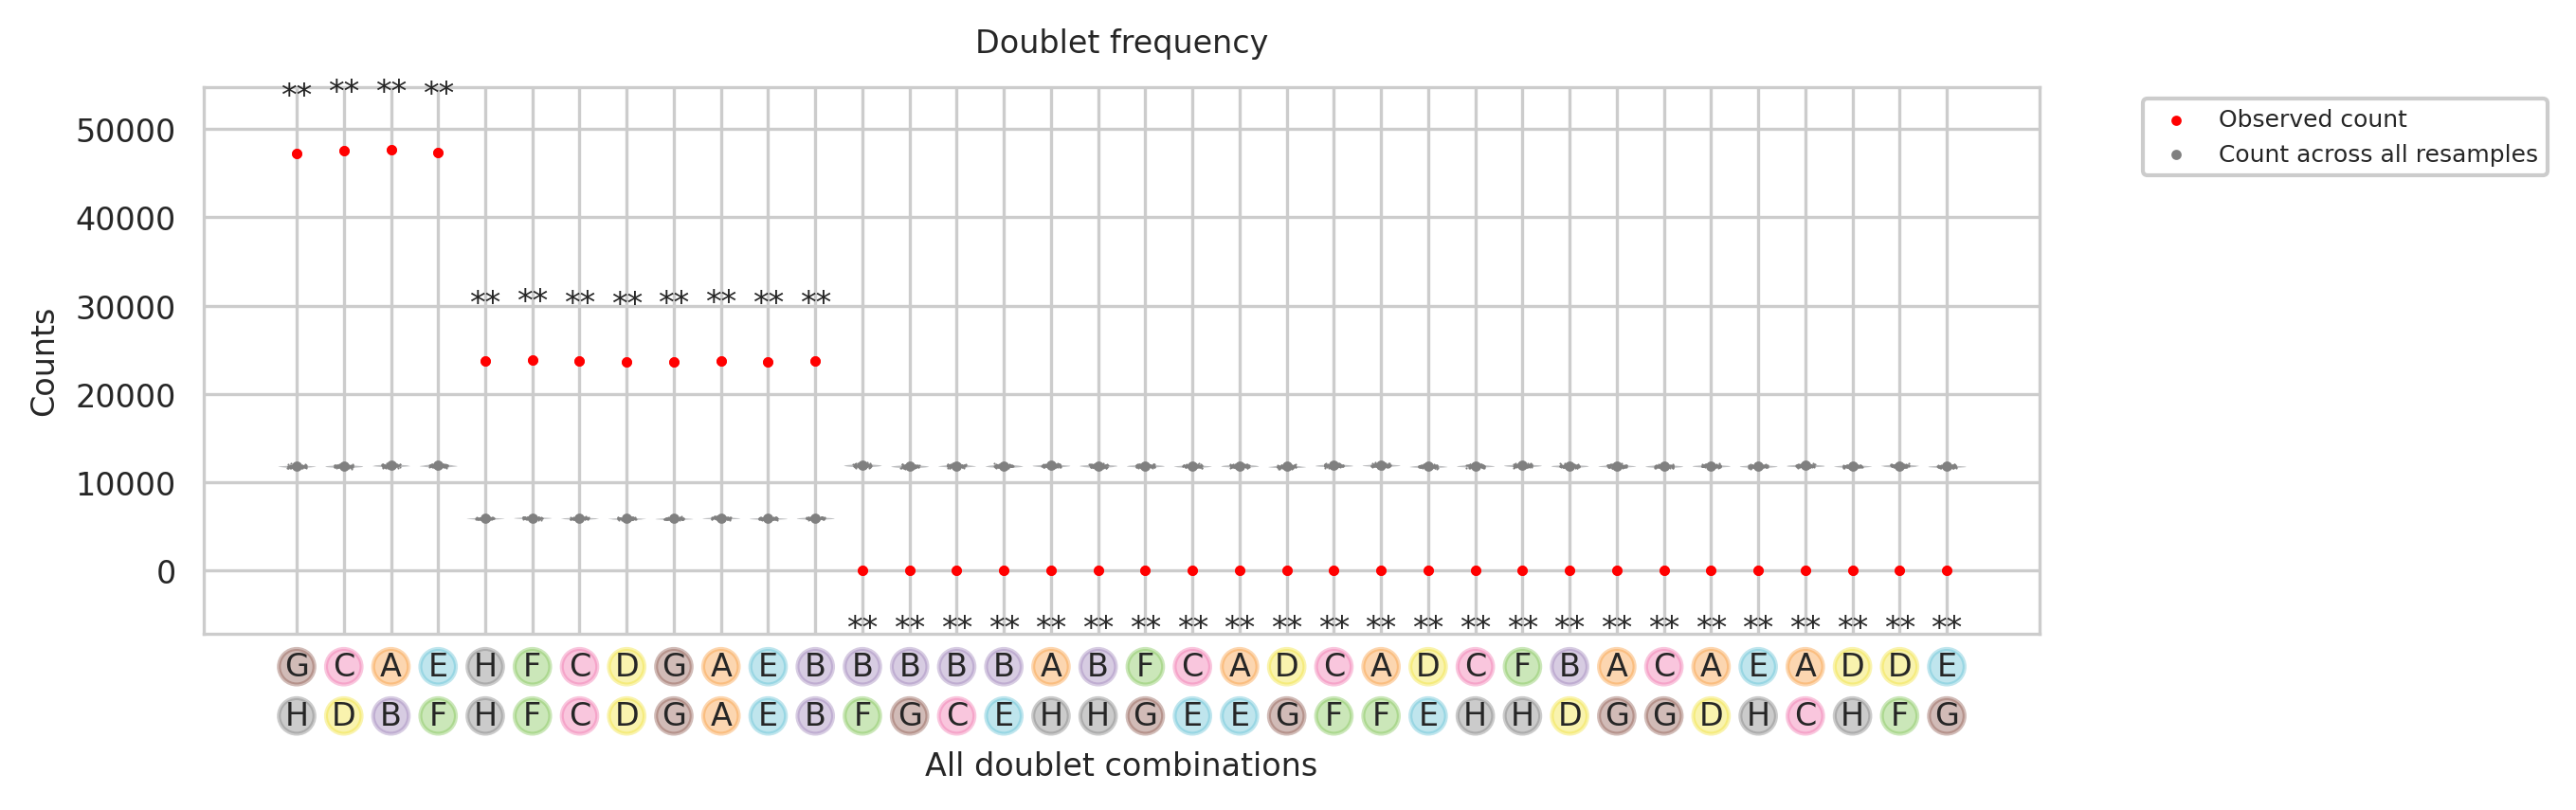

In [ ]:
plot_frequency('doublet', 
                    df_true_melt_subset_doublet, 
                    df_melt_subset_doublet, 
                    df_melt_100resamples_subset_doublet, 
                    cell_color_dict,
                    use_expected=False,
                    fdr_type='fdr_tsbh',
                    cutoff=None, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

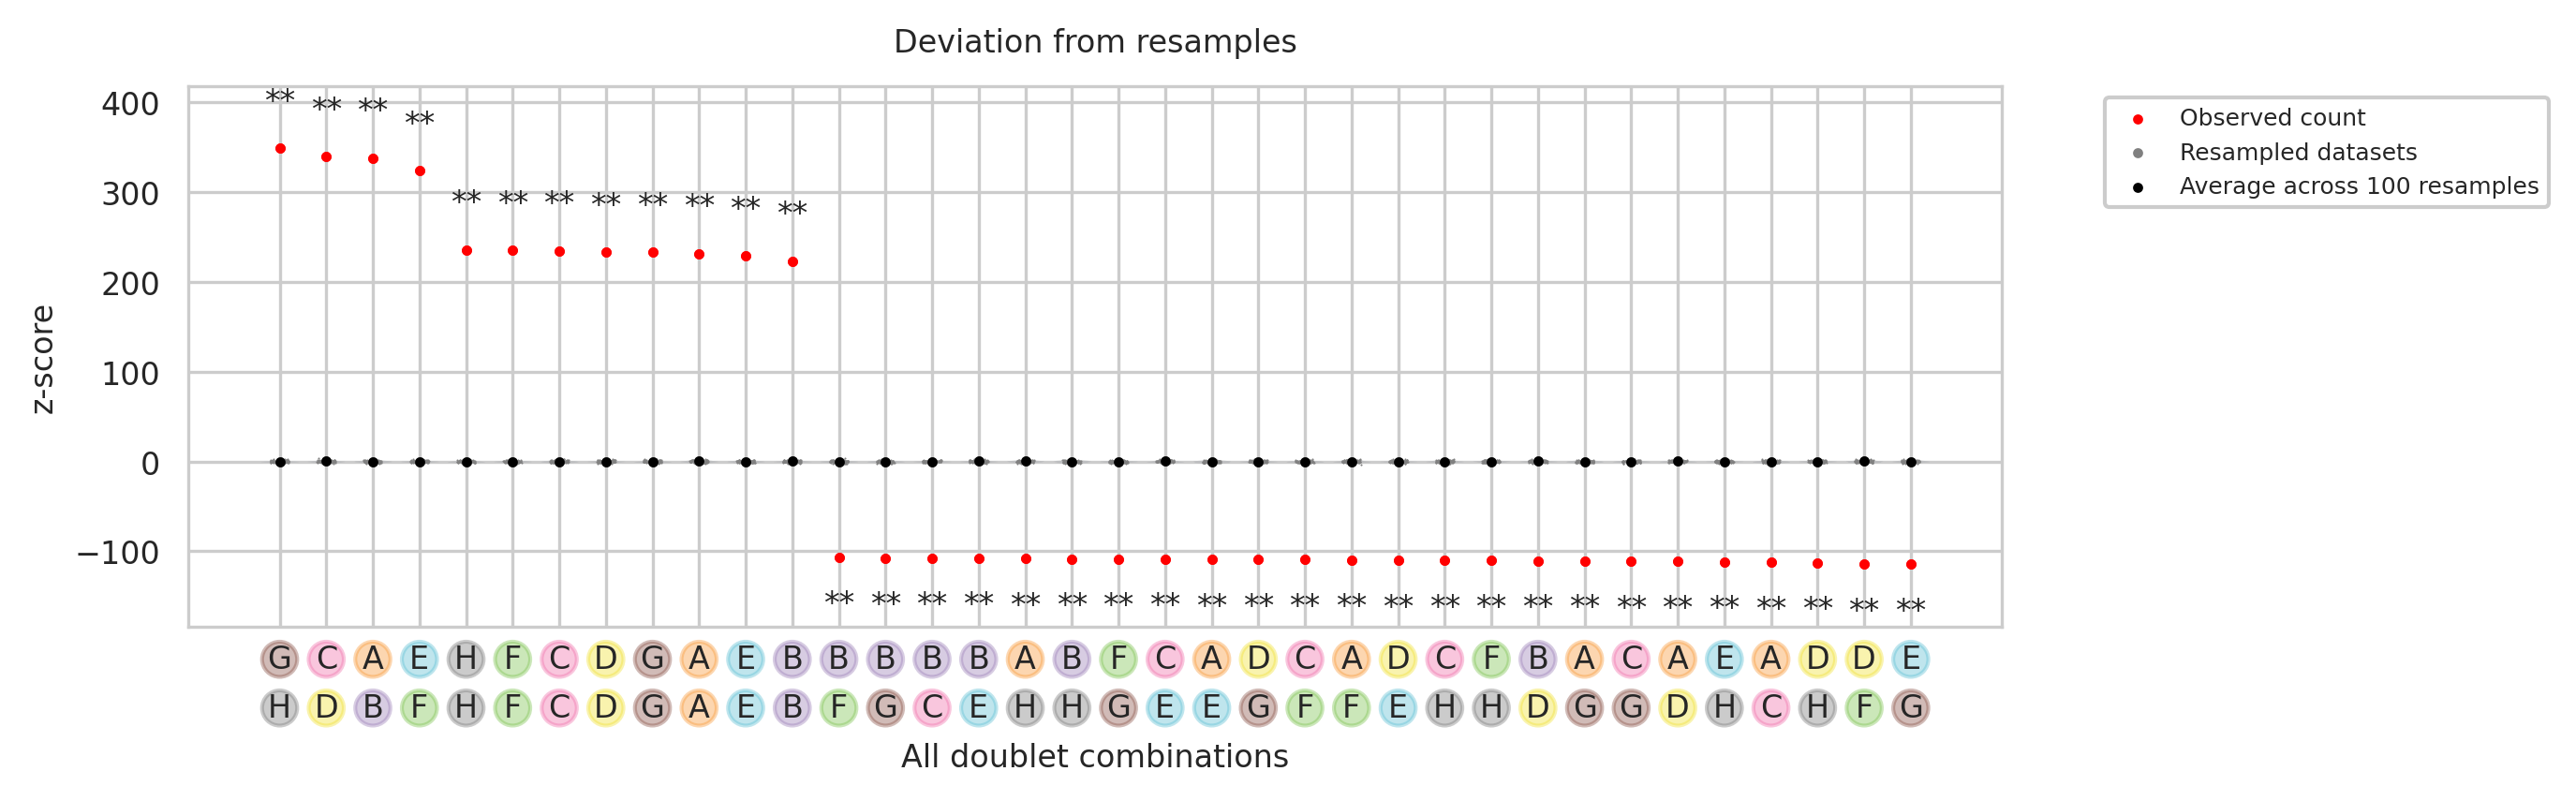

In [ ]:
plot_deviation('doublet', 
                    df_true_melt_subset_doublet, 
                    df_null_zscores_i_c_melt_subset_doublet, 
                    df_null_zscores_i_c_melt_100resamples_subset_doublet, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=None, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=100,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_doublet_v02')

In [ ]:
(quartet_dict, 
 cell_fates, 
 dfs_c_quartet) = resample_trees_quartets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto',
                                           calc_expected=False
                                           )

In [ ]:
(quartet_dict_ss,
 df_true_melt_subset_quartet, 
 df_melt_subset_quartet, 
 df_melt_100resamples_subset_quartet, 
 df_null_zscores_i_c_melt_subset_quartet, 
 df_null_zscores_i_c_melt_100resamples_subset_quartet) = dfs_for_plotting(dfs_c_quartet, 
                                                                       1000, 
                                                                       quartet_dict, 
                                                                       cutoff=60, 
                                                                       num_null=100,
                                                                       use_expected=False,
                                                                         min_cell_types=3)

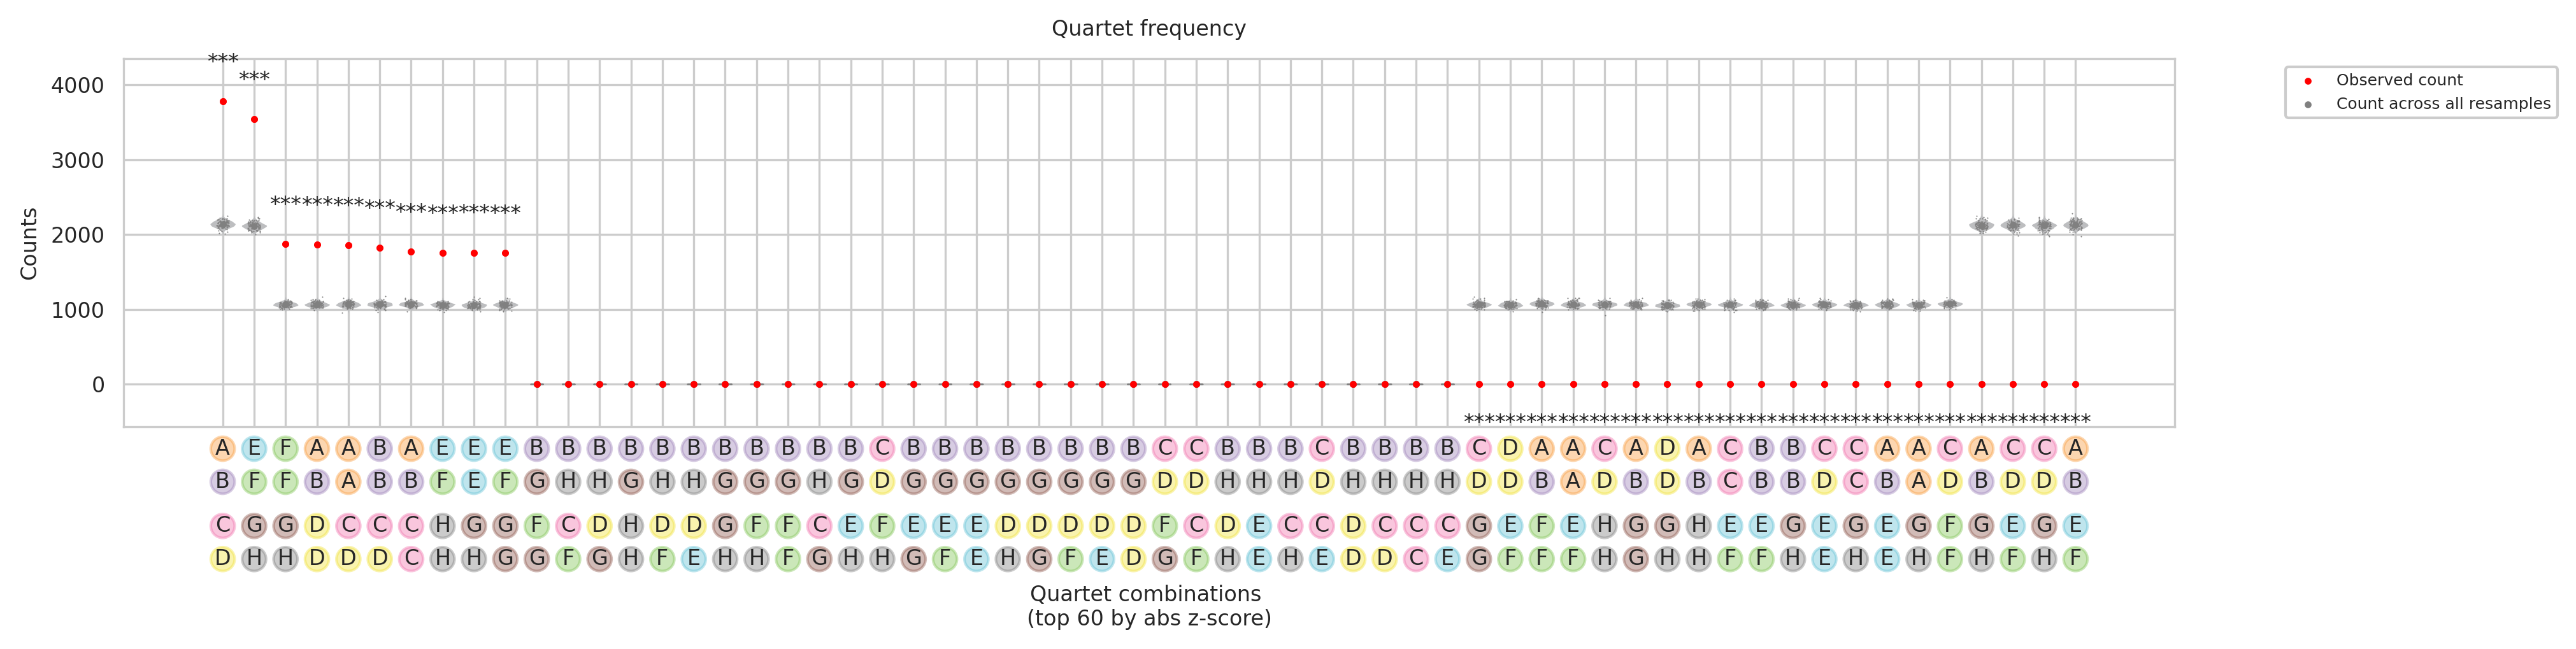

In [ ]:
plot_frequency('quartet', 
                    df_true_melt_subset_quartet, 
                    df_melt_subset_quartet, 
                    df_melt_100resamples_subset_quartet, 
                    cell_color_dict,
                    use_expected=False,
                    fdr_type='fdr_tsbh',
                    cutoff=60, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

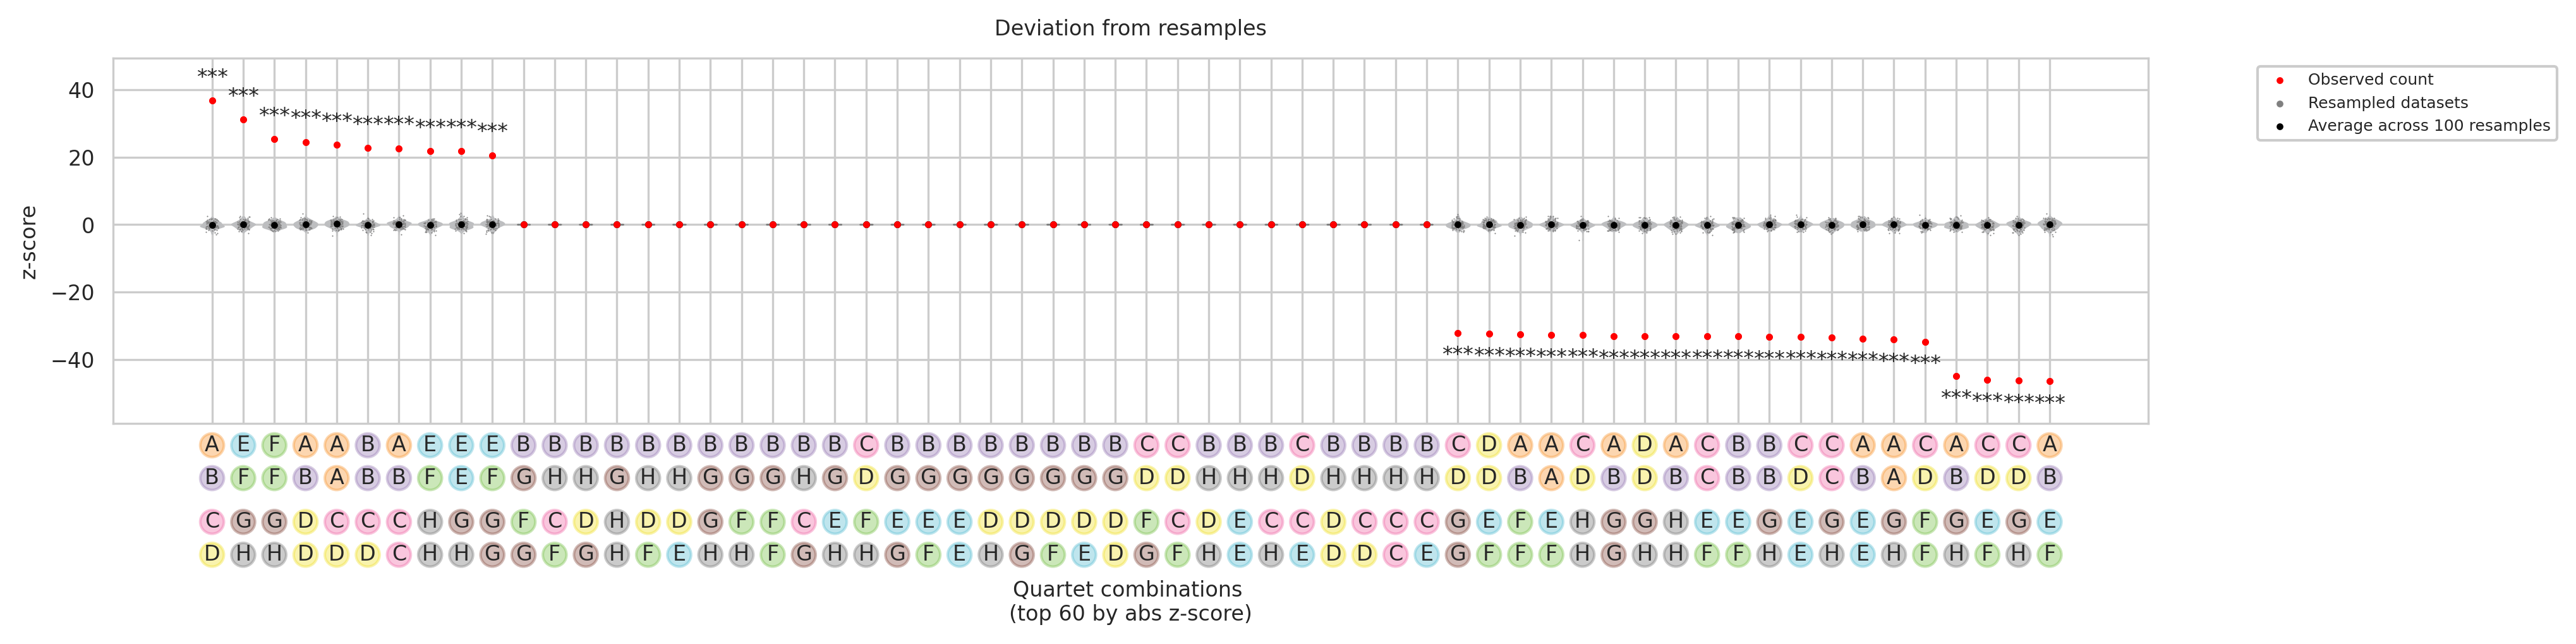

In [ ]:
plot_deviation('quartet', 
                    df_true_melt_subset_quartet, 
                    df_null_zscores_i_c_melt_subset_quartet, 
                    df_null_zscores_i_c_melt_100resamples_subset_quartet, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=60, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=100,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_quartet_v02')

In [ ]:
(octet_dict, 
 cell_fates, 
 dfs_c_octet) = resample_trees_octets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto',
                                           calc_expected=False
                                           )

100%|██████████| 443556/443556 [12:01<00:00, 614.72it/s] 
222111it [00:00, 2140184.83it/s]
100%|██████████| 221208/221208 [02:21<00:00, 1559.59it/s]


In [ ]:
(octet_dict_ss,
 df_true_melt_subset_octet, 
 df_melt_subset_octet, 
 df_melt_100resamples_subset_octet, 
 df_null_zscores_i_c_melt_subset_octet, 
 df_null_zscores_i_c_melt_100resamples_subset_octet) = dfs_for_plotting(dfs_c_octet, 
                                                                       1000, 
                                                                       octet_dict, 
                                                                       cutoff=60, 
                                                                       num_null=1,
                                                                       use_expected=False,
                                                                         min_cell_types=7)

100%|██████████| 1/1 [03:44<00:00, 224.98s/it]


In [ ]:
df_true_melt_subset_octet

,subtree_val,observed,z-score,abs z-score,label,null min,null mean,null max,p_val,adj_p_val_fdr_bh,adj_p_val_fdr_tsbh,null z-score min,null z-score mean,null z-score max
507,507,9.0,3.878710,3.878710,"(((A,B),(C,C)),((E,F),(G,H)))",0.0,2.753,9.0,0.002,0.12,0.12,0.774872,0.774872,0.774872
560,560,5.0,1.461575,1.461575,"(((A,B),(C,D)),((E,E),(G,H)))",0.0,2.615,9.0,0.133,1.00,1.00,-0.377100,-0.377100,-0.377100
567,567,4.0,0.668902,0.668902,"(((A,B),(C,D)),((E,F),(H,H)))",0.0,2.842,12.0,0.310,1.00,1.00,0.091312,0.091312,0.091312
579,579,3.0,0.137380,0.137380,"(((A,B),(C,D)),((F,F),(G,H)))",0.0,2.775,9.0,0.533,1.00,1.00,0.137450,0.137450,0.137450
6981,6981,0.0,0.000000,0.000000,"(((A,G),(B,D)),((C,H),(D,E)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000
6946,6946,0.0,0.000000,0.000000,"(((A,G),(B,D)),((B,F),(C,H)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000
6918,6918,0.0,0.000000,0.000000,"(((A,G),(B,C)),((D,G),(E,H)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000
6920,6920,0.0,0.000000,0.000000,"(((A,G),(B,C)),((D,H),(E,E)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000
6927,6927,0.0,0.000000,0.000000,"(((A,G),(B,C)),((E,E),(F,H)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000
6921,6921,0.0,0.000000,0.000000,"(((A,G),(B,C)),((D,H),(E,F)))",0.0,0.000,0.0,1.000,1.00,1.00,0.000000,0.000000,0.000000


In [ ]:
plot_frequency('octet', 
                    df_true_melt_subset_octet, 
                    df_melt_subset_octet, 
                    df_melt_100resamples_subset_octet, 
                    cell_color_dict,
                    use_expected=False,
                    fdr_type='fdr_tsbh',
                    cutoff=60, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

NameError: name 'cell_color_dict' is not defined

In [ ]:
plot_deviation('octet', 
                    df_true_melt_subset_octet, 
                    df_null_zscores_i_c_melt_subset_octet, 
                    df_null_zscores_i_c_melt_100resamples_subset_octet, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=60, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=100,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_octet_v02')